# Prerequisities

In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_style("whitegrid")

# Load stats

In [2]:
models_dir = '../models'
json_files = []

for model_name in os.listdir(models_dir):
    model_dir = os.path.join(models_dir, model_name)
    if os.path.isdir(model_dir):
        stats_dir = os.path.join(model_dir, 'stats')
        for file in os.listdir(stats_dir):
            if file.endswith('.json'):
                json_files.append(os.path.join(stats_dir, file))

json_files

['../models/cnn_4/stats/cnn_4_2.json',
 '../models/cnn_4/stats/cnn_4_3.json',
 '../models/cnn_4/stats/cnn_4_0.json',
 '../models/cnn_4/stats/cnn_4_1.json',
 '../models/resnet9/stats/resnet9_0.json',
 '../models/resnet9/stats/resnet9_2.json',
 '../models/resnet9/stats/resnet9_1.json',
 '../models/resnet9/stats/resnet9_3.json',
 '../models/rn18_freeze/stats/rn18_freeze_0.json',
 '../models/rn18/stats/rn18_0.json']

In [3]:
stats_list = []
for fname in json_files:
    with open(fname, 'r') as f:
        stats_list.append(json.load(f))

In [4]:
cnns = list(filter(lambda d: d['model'] == 'cnn_4', stats_list))
cnn_best = list(
    filter(
        lambda d: d['data_augmentation'] & d['batch_norm'] &
        (d['optimizer'] == 'ADAM'), cnns))

In [5]:
def stat_to_setting(stat):
    if stat['optimizer'] == 'SGD':
        return 3
    if not stat['data_augmentation']:
        return 1
    if not stat['batch_norm']:
        return 2
    else:
        return 0
settingls = ['-', '--', ':', '-.']
stat2ls = lambda stat: settingls[stat_to_setting(stat)]

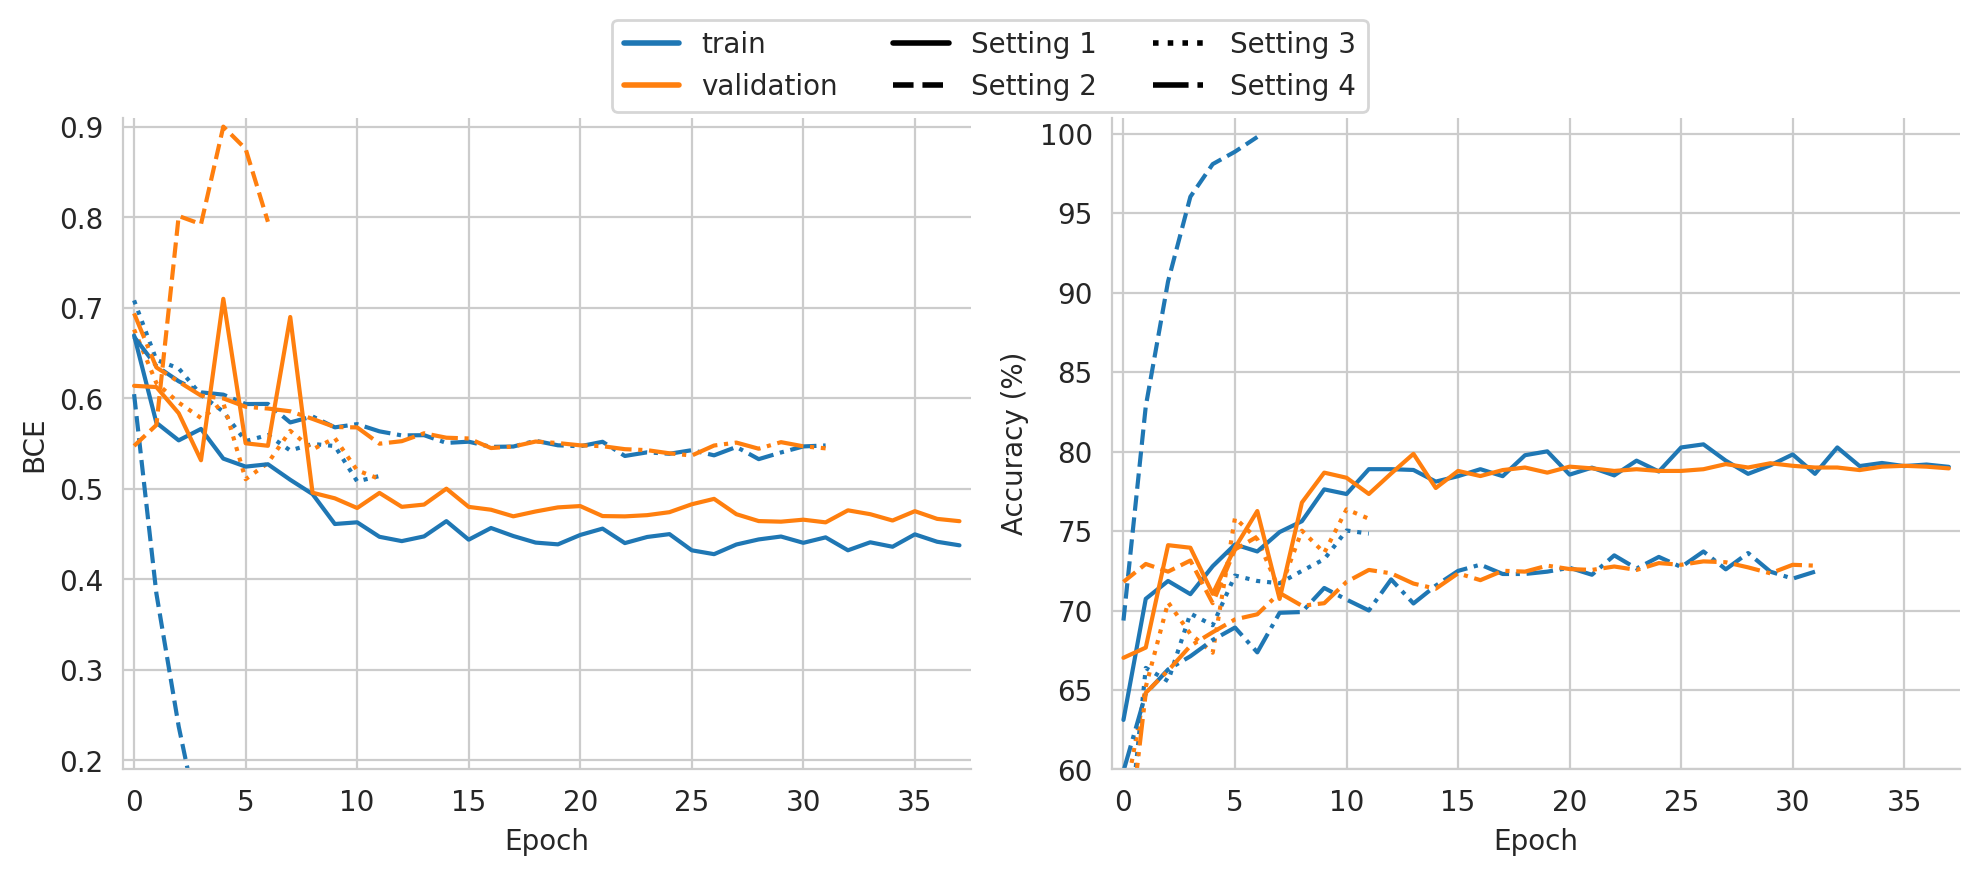

In [6]:
c1, c2 = plt.rcParams['axes.prop_cycle'].by_key()['color'][:2]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True, dpi=200)

max_epoch = 0
for cnn in cnns:
    ls = stat2ls(cnn)
    ax0.plot(cnn['train_loss'], c=c1, ls=ls, label='train')
    ax0.plot(cnn['val_loss'], c=c2, ls=ls, label='validation')
    ax0.set_xlabel('Epoch')
    ax0.set_ylabel('BCE')

    ax1.plot(np.array(cnn['train_acc']) * 100, c=c1, ls=ls, label='train')
    ax1.plot(np.array(cnn['val_acc']) * 100, c=c2, ls=ls, label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy (%)')

    max_epoch = max(cnn['epoch'][-1], max_epoch)

ax0.set_xlim((-.5, max_epoch+.5))
ax1.set_xlim((-.5, max_epoch+.5))

ax0.set_ylim((0.19, 0.91))
ax1.set_ylim((60, 101))

custom_lines = [
    Line2D([0], [0], color=c1, lw=2, label='train'),
    Line2D([0], [0], color=c2, lw=2, label='validation'),
    Line2D([0], [0], color='k', lw=2, ls='-', label='Setting 1'),
    Line2D([0], [0], color='k', lw=2, ls='--', label='Setting 2'),
    Line2D([0], [0], color='k', lw=2, ls=':', label='Setting 3'),
    Line2D([0], [0], color='k', lw=2, ls='-.', label='Setting 4')
]

fig.legend(loc='upper center',
           ncol=3,
           bbox_to_anchor=(0.5, 1.1),
           handles=custom_lines);
sns.despine(top=True, right=True)
fig.savefig('../figs/CNN_base.png', bbox_inches='tight')

In [7]:
model2ls = {'cnn_4': '-', 'resnet': '--', 'rn18': ':', 'rn18_freeze': '-.'}
model2ls_beauty = {'CNN': '-', 'ResNet': '--', 'ResNet18*': ':', 'ResNet18* (frozen)': '-.'}

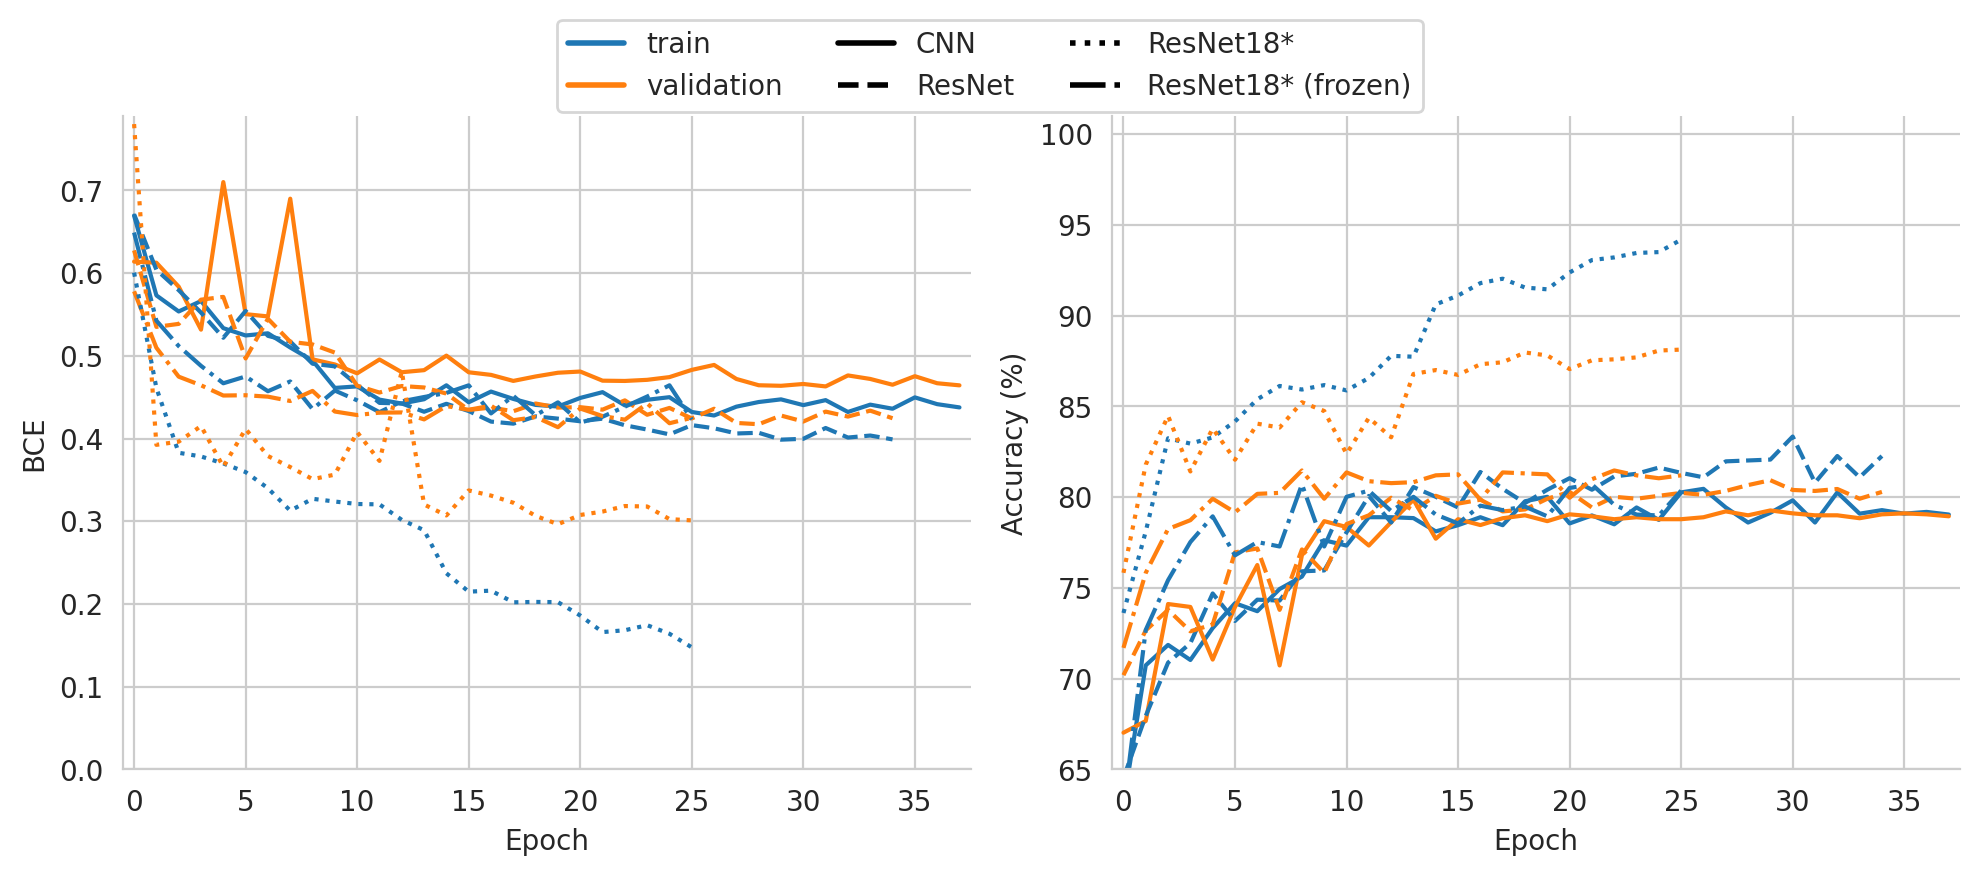

In [8]:
c1, c2 = plt.rcParams['axes.prop_cycle'].by_key()['color'][:2]
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True, dpi=200)

max_epoch = 0
for stats in stats_list:
    if not stat_to_setting(stats) == 0:
        continue
    ls = model2ls[stats['model']]
    ax0.plot(stats['train_loss'], c=c1, ls=ls, label='train')
    ax0.plot(stats['val_loss'], c=c2, ls=ls, label='validation')
    ax0.set_xlabel('Epoch')
    ax0.set_ylabel('BCE')

    ax1.plot(np.array(stats['train_acc']) * 100, c=c1, ls=ls, label='train')
    ax1.plot(np.array(stats['val_acc']) * 100, c=c2, ls=ls, label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy (%)')

    max_epoch = max(stats['epoch'][-1], max_epoch)

ax0.set_xlim((-.5, max_epoch+0.5))
ax1.set_xlim((-.5, max_epoch+0.5))

ax0.set_ylim((0, 0.79))
ax1.set_ylim((65, 101))

custom_lines = [
    *[Line2D([0], [0], color=c1, lw=2, label='train'),
    Line2D([0], [0], color=c2, lw=2, label='validation')],
    *[Line2D([0], [0], color='k', lw=2, ls=v, label=k) for k, v in model2ls_beauty.items()]
]

fig.legend(loc='upper center',
           ncol=3,
           bbox_to_anchor=(0.5, 1.1),
           handles=custom_lines);
sns.despine()
fig.savefig('../figs/all_models.png', bbox_inches='tight')